# Test hipy.pltext


## Extension of plt

J. A. Hernando-Morata

05/04/2021


In [1]:
%matplotlib inline

%load_ext autoreload
%autoreload 2

#### Importing modules

In [2]:
import numpy  as np
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt

import scipy.constants as constants

import warnings
warnings.filterwarnings('ignore')

In [3]:
import hipy.pltext as pltext
import hipy.utils  as ut
import hipy.cfit   as cfit
import hipy.efit   as efit
import hipy.histos as histos

pltext.style()

## Histogram

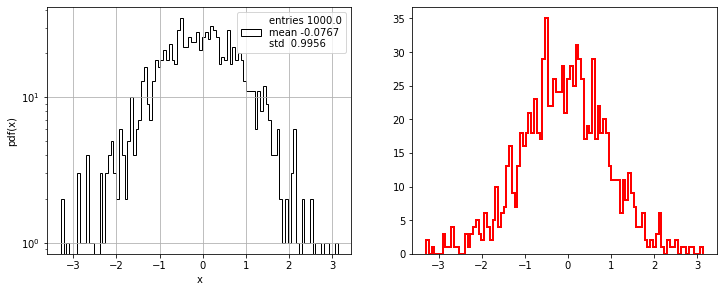

In [4]:
xs = np.random.normal(size = 1000)

subplot = pltext.canvas(4)

subplot(1)
pltext.hist(xs, 100, xylabels=('x', 'pdf(x)'), ylog = True, formate = '6.4f');
subplot(2)
pltext.hist(xs, 100, stats = False, lw = 2, color = 'red', grid = False);

## Histogram Fit

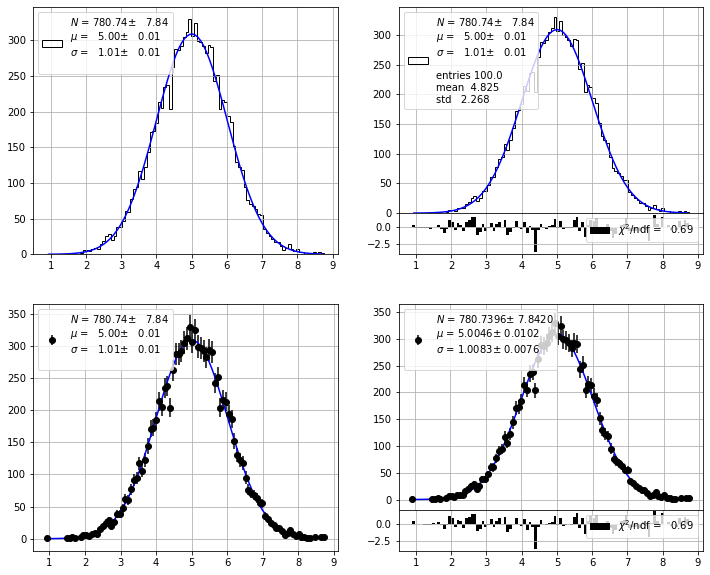

In [6]:
name, pars  = 'gaus', (5, 1)
nbins, size = 100, 10000

stat = efit.stat(name)
rv   = stat.rvs(*pars, size = size)

subplot = pltext.canvas(4)

subplot(1)
pltext.hfit(rv, nbins, name);
subplot(2)
pltext.hfit(rv, nbins, name, stats = True, residuals = True);
subplot(3)
pltext.hfit(rv, nbins, name, mode = 'plot');
subplot(4)
pltext.hfit(rv, nbins, name, mode = 'plot', residuals = True, formate = '6.4f');

### Composite Fit

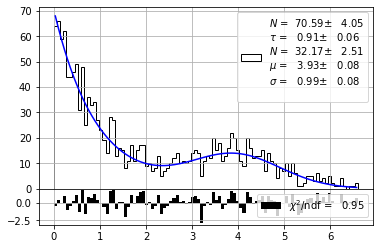

In [7]:
name, pars = 'exp+gaus', (1000, 1., 500, 4., 1.)
nbins      = 100

stat = efit.stat(name)
rv   = stat.rvs(*pars)

pltext.hfit(rv, nbins, name, p0 = pars, residuals = True);

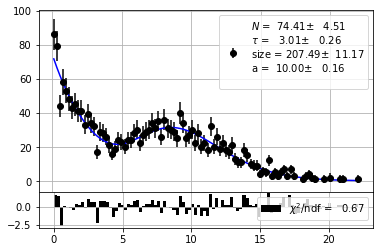

In [8]:
name, pars = 'exp+gamma', (1000., 3., 1000., 10.)
nbins      = 100
stat = efit.stat(name)
rv   = stat.rvs(*pars)

pltext.hfit(rv, nbins, name, p0 = pars, residuals = True, mode = 'plot');

## Profile

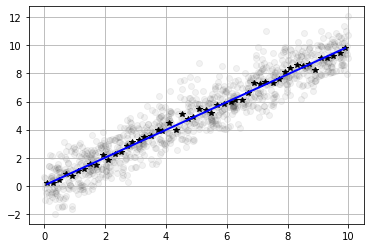

In [12]:
size, nbins         = 1000, 50
scale, slope, sigma = 10, 1, 1.
xs = scale * np.random.uniform(size = size)
ys = slope * xs + sigma * np.random.normal(size = size)

plt.scatter(xs, ys, alpha = 0.05)
ysize, xmed, xstd, ymed, ystd  = histos.hprofile(xs, ys, nbins)

plt.plot(xmed, ymed, marker = '*', ls = '')

yerr = ystd/np.sqrt(ysize)
pars, upars, ffun = cfit.curve_fit(xmed, ymed, 'poly.1', sigma = yerr)
plt.plot(xmed, ffun(xmed), color = 'blue', lw =2)
plt.grid();

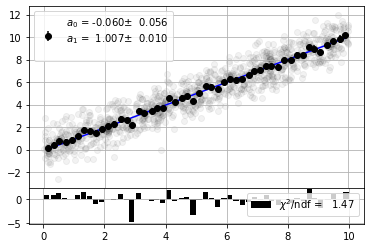

In [13]:
size, nbins         = 1000, 50
scale, slope, sigma = 10, 1, 1.
xs = scale * np.random.uniform(size = size)
ys = slope * xs + sigma * np.random.normal(size = size)

plt.scatter(xs, ys, alpha = 0.05)
xc, yc, ye, pars, upars, ffun = \
pltext.hfitprofile(xs, ys, nbins, 'poly.1', residuals = True, formate = '6.3f');

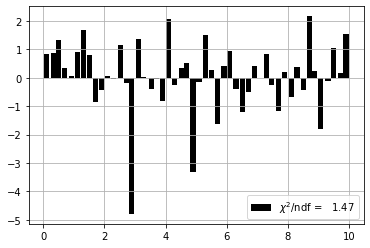

In [14]:
pltext.hresiduals(xc, yc, ffun, ye)